### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [3]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 1.3974 - accuracy: 0.6636 - val_loss: 0.3380 - val_accuracy: 0.9127
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.9134 - val_loss: 0.2373 - val_accuracy: 0.9317
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.935

### Relu Activation Function

In [5]:
# Write your code here. Use the same architecture as above. 
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6322 - accuracy: 0.8264 - val_loss: 0.2097 - val_accuracy: 0.9377
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9450 - val_loss: 0.1652 - val_accuracy: 0.9511
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9

### Write your findings about activations here?

1.   Accuracy is good for relu activation function
2.   Loss is also minimized for relu activation function




# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.0767 - accuracy: 0.3913 - val_loss: 1.3034 - val_accuracy: 0.6915
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.1184 - accuracy: 0.7374 - val_loss: 0.7332 - val_accuracy: 0.8122
Test loss: 0.7332254648208618
Test accuracy: 0.8122000098228455
Shape of First Layer (784, 8)
Visual

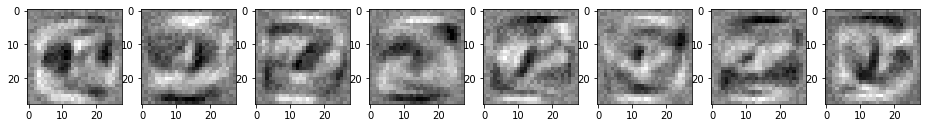

In [6]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.3315 - accuracy: 0.7096 - val_loss: 0.3568 - val_accuracy: 0.9102
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.9112 - val_loss: 0.2371 - val_accuracy: 0.9337
Test loss: 0.23712165653705597
Test accuracy: 0.9337000250816345
Shape of First Layer (784, 128)

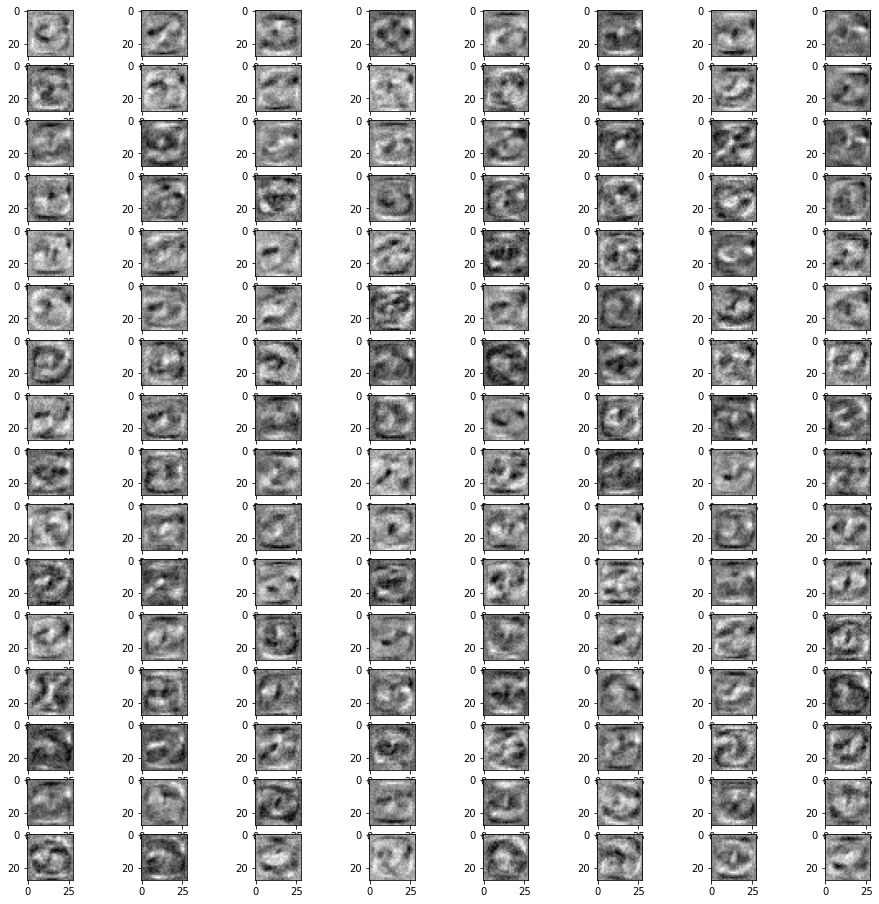

In [7]:
first_layer_size = 128

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Write your findings about influence of nodes here?

1.   By increase the number of nodes, the output of first layer is good
2.   Loss is minimized and accuracy is improved




# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [8]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7809 - accuracy: 0.7897 - val_loss: 0.2638 - val_accuracy: 0.9249
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.9280 - val_loss: 0.2123 - val_accuracy: 0.9392
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2035 - accuracy: 0.9415 - val_loss: 0.1805 - val_accuracy: 0.9477
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1767 - acc

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell 

In [9]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.1380 - accuracy: 0.6729 - val_loss: 0.3630 - val_accuracy: 0.8969
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8965 - val_loss: 0.3033 - val_accuracy: 0.9142
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.9102 - val_loss: 0.2897 - val_accuracy: 0.9154
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2864 - accur

### Write your findings about influence of layers here?

1.   reducing the number of hidden nodes, the accuracy is reduced and loss is increased
2. number of parameters also reduced which reduces the training time